In [1]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
from google.colab.patches import cv2_imshow

In [2]:
# Fungsi untuk menampilkan gambar dalam format RGB
def show_image(title, img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

Saving castil.jpg to castil.jpg


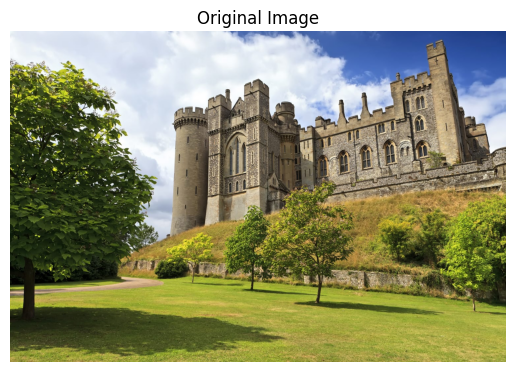

In [3]:
# Upload file gambar yang akan digunakan
uploaded = files.upload()
filename = list(uploaded.keys())[0]
image = cv2.imread(filename)
show_image("Original Image", image)

In [15]:
# Upload gambar template
print("Unggah gambar template (objek yang dicari):")
uploaded_template = files.upload()
filename_template = list(uploaded_template.keys())[0]
template = cv2.imread(filename_template)

Unggah gambar template (objek yang dicari):


Saving Tree.jpg to Tree.jpg


In [4]:
def detect_lines(image_path):
    # Baca gambar
    img = cv2.imread(image_path)

    # Konversi ke grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplikasikan Gaussian Blur untuk mengurangi noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Deteksi tepi menggunakan Canny
    edges = cv2.Canny(blur, 50, 150)

    # Aplikasikan Hough Transform
    lines = cv2.HoughLinesP(
        edges,          # Input edge image
        rho=1,         # Distance resolution in pixels
        theta=np.pi/180, # Angle resolution in radians
        threshold=100,  # Minimum number of votes for valid line
        minLineLength=100, # Minimum allowed length of line
        maxLineGap=10   # Maximum allowed gap between line segments
    )

    # Gambar garis pada gambar asli
    result = img.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(result, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return edges, result

def show_results(image_path):
    # Deteksi garis
    edges, result = detect_lines(image_path)

    # Tampilkan hasil
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(edges, cmap='gray')
    plt.title('Deteksi Tepi')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title('Hasil Deteksi Garis')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

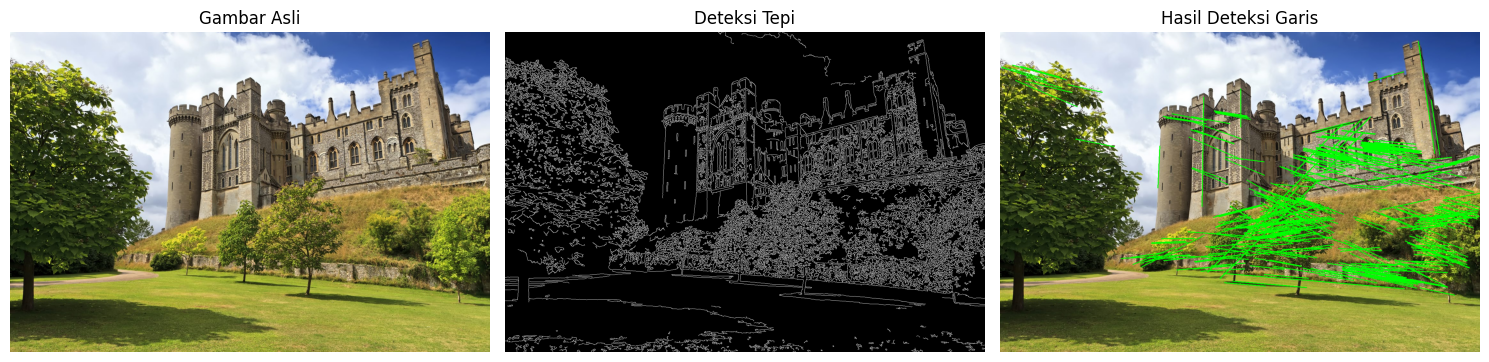

In [5]:
# Lakukan eksekusi
if __name__ == "__main__":
    # Ganti dengan path gambar Anda
    image_path = "castil.jpg"
    show_results(image_path)

In [20]:
def template_matching(image_path, template_path, threshold=0.8):
    # Baca gambar utama dan template
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    template = cv2.imread(template_path, 0)
    w, h = template.shape[::-1]

    # Daftar semua metode template matching yang tersedia
    methods = [
        'cv2.TM_CCOEFF_NORMED',
        'cv2.TM_CCORR_NORMED',
        'cv2.TM_SQDIFF_NORMED'
    ]

    results = []

    for meth in methods:
        # Evaluasi string metode menjadi fungsi aktual
        method = eval(meth)

        # Aplikasikan template matching
        res = cv2.matchTemplate(img_gray, template, method)

        # Mendapatkan lokasi dari nilai maksimum/minimum
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
            top_left = min_loc
        else:
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
            top_left = max_loc

        # Menggambar kotak pada objek yang terdeteksi
        bottom_right = (top_left[0] + w, top_left[1] + h)
        result = img.copy()
        cv2.rectangle(result, top_left, bottom_right, (0, 255, 0), 2)

        # Menyimpan hasil untuk ditampilkan
        results.append({
            'method': meth,
            'result': result,
            'confidence_map': res
        })

    return results

def show_results(results):
    # Menampilkan hasil untuk setiap metode
    plt.figure(figsize=(15, 5 * len(results)))

    for idx, res in enumerate(results):
        # Plot hasil deteksi
        plt.subplot(len(results), 2, 2*idx + 1)
        plt.imshow(cv2.cvtColor(res['result'], cv2.COLOR_BGR2RGB))
        plt.title(f"Detected Object using {res['method']}")
        plt.axis('off')

        # Plot peta confidence
        plt.subplot(len(results), 2, 2*idx + 2)
        plt.imshow(res['confidence_map'], cmap='hot')
        plt.title(f"Confidence Map for {res['method']}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def detect_multiple_objects(image_path, template_path, threshold=0.8, method=cv2.TM_CCOEFF_NORMED):
    # Baca gambar dan template
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    template = cv2.imread(template_path, 0)
    w, h = template.shape[::-1]

    # Aplikasikan template matching
    res = cv2.matchTemplate(img_gray, template, method)

    # Temukan lokasi dimana matching value melebihi threshold
    loc = np.where(res >= threshold)

    # Gambar kotak untuk setiap objek yang terdeteksi
    result = img.copy()
    for pt in zip(*loc[::-1]):
        cv2.rectangle(result, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

    return result, res

 # Tampilkan hasil deteksi multiple objek
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(result_multi, cv2.COLOR_BGR2RGB))
    plt.title("Multiple Object Detection")
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(confidence_map, cmap='hot')
    plt.title("Confidence Map")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

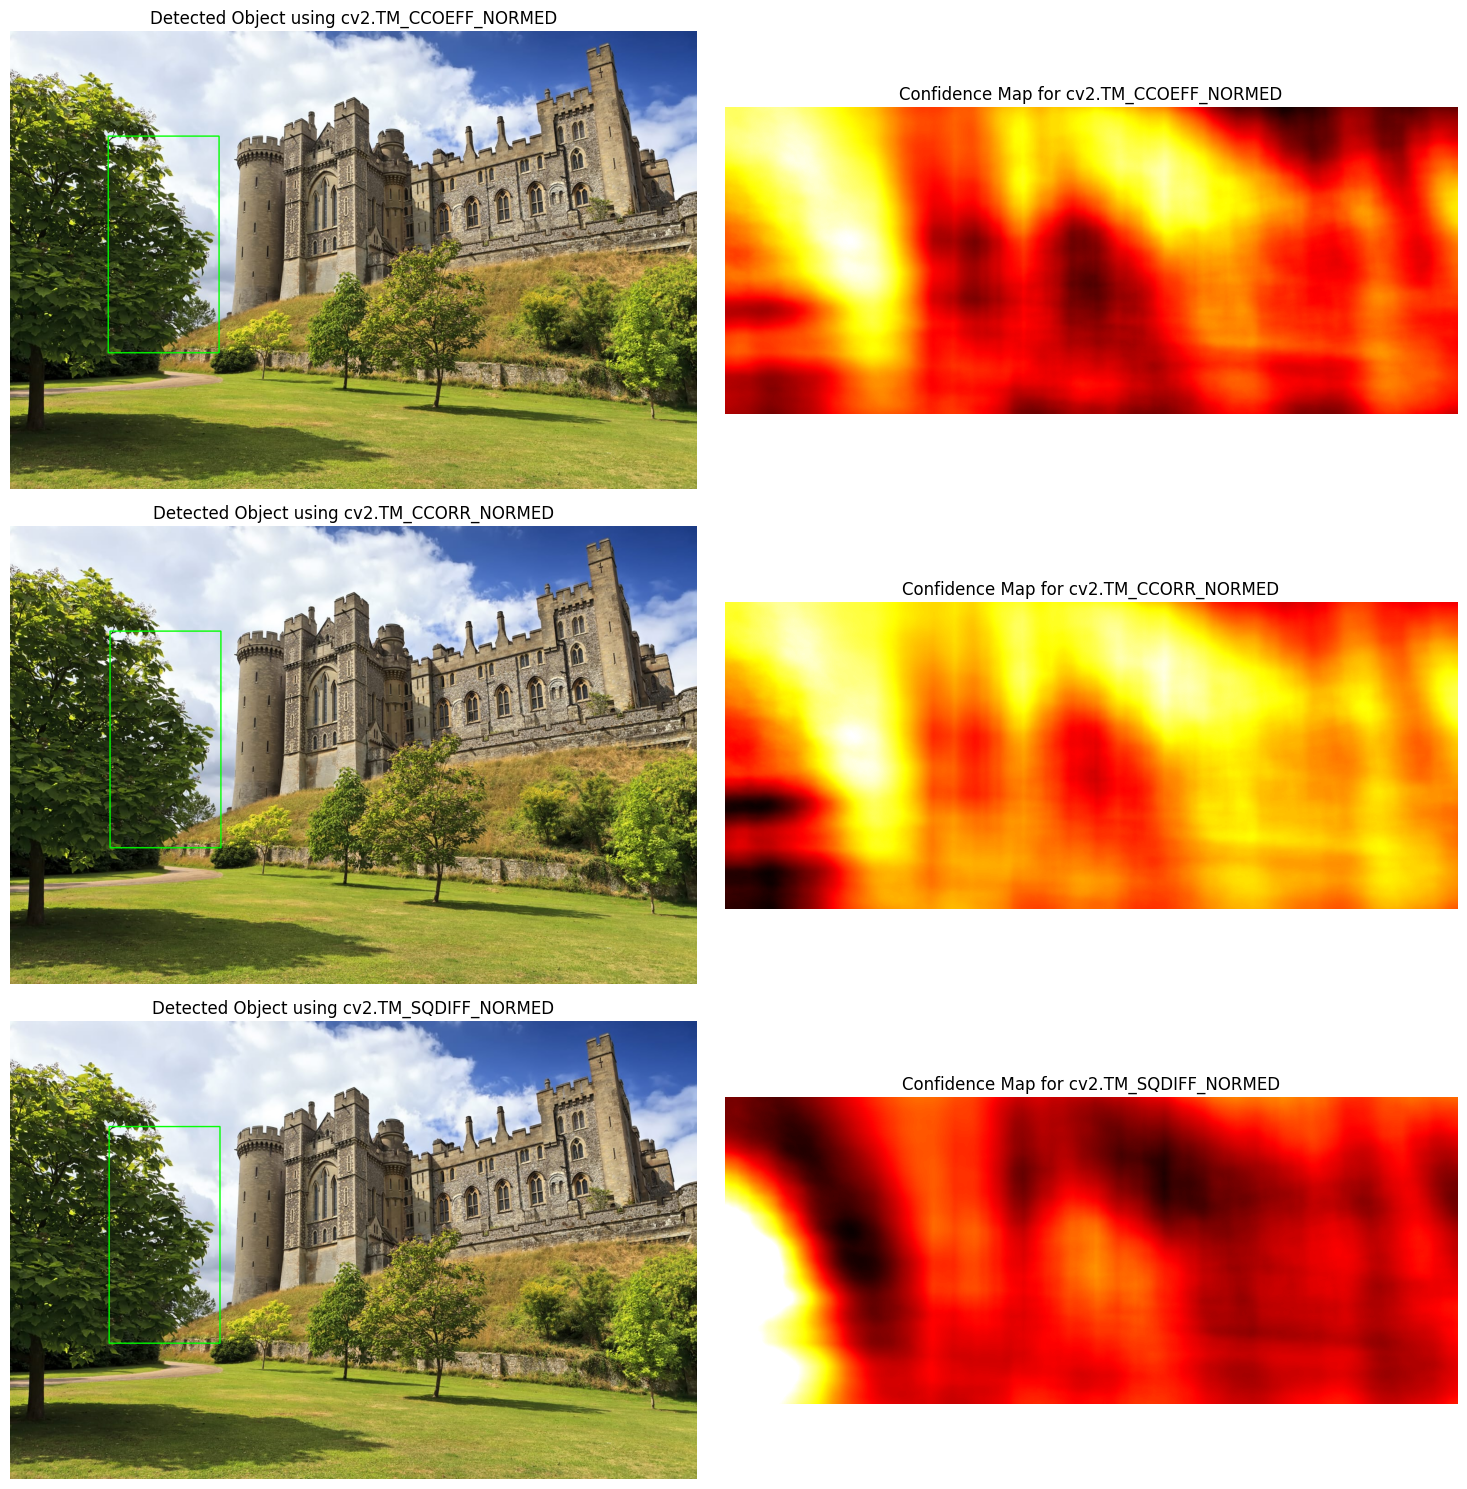

In [21]:
if __name__ == "__main__":
    # Ganti dengan path gambar dan template Anda
    image_path = "castil.jpg"
    template_path = "Tree.jpg"

    # Deteksi menggunakan berbagai metode
    results = template_matching(image_path, template_path)
    show_results(results)

    # Deteksi multiple objek
    result_multi, confidence_map = detect_multiple_objects(image_path, template_path)

In [60]:
class ImageProcessor:
    def create_pyramid(image_path, levels=4):
        """Membuat pyramid gambar"""
        img = cv2.imread(image_path)
        gaussian_pyramid = [img]

        # Membuat Gaussian Pyramid
        for i in range(levels):
            img = cv2.pyrDown(img)
            gaussian_pyramid.append(img)

        # Membuat Laplacian Pyramid
        laplacian_pyramid = [gaussian_pyramid[-1]]
        for i in range(levels-1, 0, -1):
            size = (gaussian_pyramid[i-1].shape[1], gaussian_pyramid[i-1].shape[0])
            expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
            laplacian = cv2.subtract(gaussian_pyramid[i-1], expanded)
            laplacian_pyramid.append(laplacian)

        return gaussian_pyramid, laplacian_pyramid

    def detect_circles(image_path):
        """Deteksi lingkaran menggunakan Hough Transform"""
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (9, 9), 2)

        # Deteksi lingkaran menggunakan Hough Circle Transform
        circles = cv2.HoughCircles(
            blurred,
            cv2.HOUGH_GRADIENT,
            dp=1,
            minDist=50,
            param1=50,
            param2=30,
            minRadius=20,
            maxRadius=100
        )

        result = img.copy()
        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                # Gambar lingkaran luar
                cv2.circle(result, (i[0], i[1]), i[2], (0, 255, 0), 2)
                # Gambar titik tengah
                cv2.circle(result, (i[0], i[1]), 2, (0, 0, 255), 3)

        return result

    @staticmethod
    def extract_dominant_colors(image_path, n_colors=5):
        """Ekstraksi warna dominan menggunakan K-Means clustering"""
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Reshape gambar ke array 2D dari pixels
        pixels = img.reshape(-1, 3)

        # Aplikasikan K-Means clustering
        kmeans = KMeans(n_clusters=n_colors, random_state=42)
        kmeans.fit(pixels)

        # Dapatkan warna dominan
        colors = kmeans.cluster_centers_

        # Hitung persentase setiap warna
        labels = kmeans.labels_
        counts = np.bincount(labels)
        percentages = counts / len(labels) * 100

        # Urutkan warna berdasarkan persentase
        colors_with_percentages = list(zip(colors, percentages))
        colors_with_percentages.sort(key=lambda x: x[1], reverse=True)

        return colors_with_percentages

    @staticmethod
    def detect_contours(image_path):
        """Deteksi kontur pada gambar"""
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Deteksi tepi menggunakan Canny
        edges = cv2.Canny(blurred, 50, 150)

        # Temukan kontur
        contours, hierarchy = cv2.findContours(
            edges,
            cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE
        )

        # Gambar kontur
        result = img.copy()
        cv2.drawContours(result, contours, -1, (0, 255, 0), 2)

        return result, contours

def visualize_results(image_path):
    """Visualisasi semua hasil pengolahan gambar"""
    processor = ImageProcessor()

    # 1. Image Pyramid
    gaussian_pyramid, laplacian_pyramid = processor.create_pyramid(image_path)

    # 2. Circle Detection
    circles_result = processor.detect_circles(image_path)

    # 3. Dominant Colors
    dominant_colors = processor.extract_dominant_colors(image_path)

    # 4. Contour Detection
    contours_result, _ = processor.detect_contours(image_path)

    # Visualisasi
    plt.figure(figsize=(20, 10))

    # Original Image
    plt.subplot(231)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Gaussian Pyramid (level 1)
    plt.subplot(232)
    plt.imshow(cv2.cvtColor(gaussian_pyramid[1], cv2.COLOR_BGR2RGB))
    plt.title('Gaussian Pyramid (Level 1)')
    plt.axis('off')

    # Circle Detection
    plt.subplot(233)
    plt.imshow(cv2.cvtColor(circles_result, cv2.COLOR_BGR2RGB))
    plt.title('Circle Detection')
    plt.axis('off')

    # Dominant Colors
    plt.subplot(234)
    colors_display = np.array([[color] * 100 for color, _ in dominant_colors])
    plt.imshow(colors_display)
    plt.title('Dominant Colors')
    plt.axis('off')

    # Contour Detection
    plt.subplot(235)
    plt.imshow(cv2.cvtColor(contours_result, cv2.COLOR_BGR2RGB))
    plt.title('Contour Detection')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

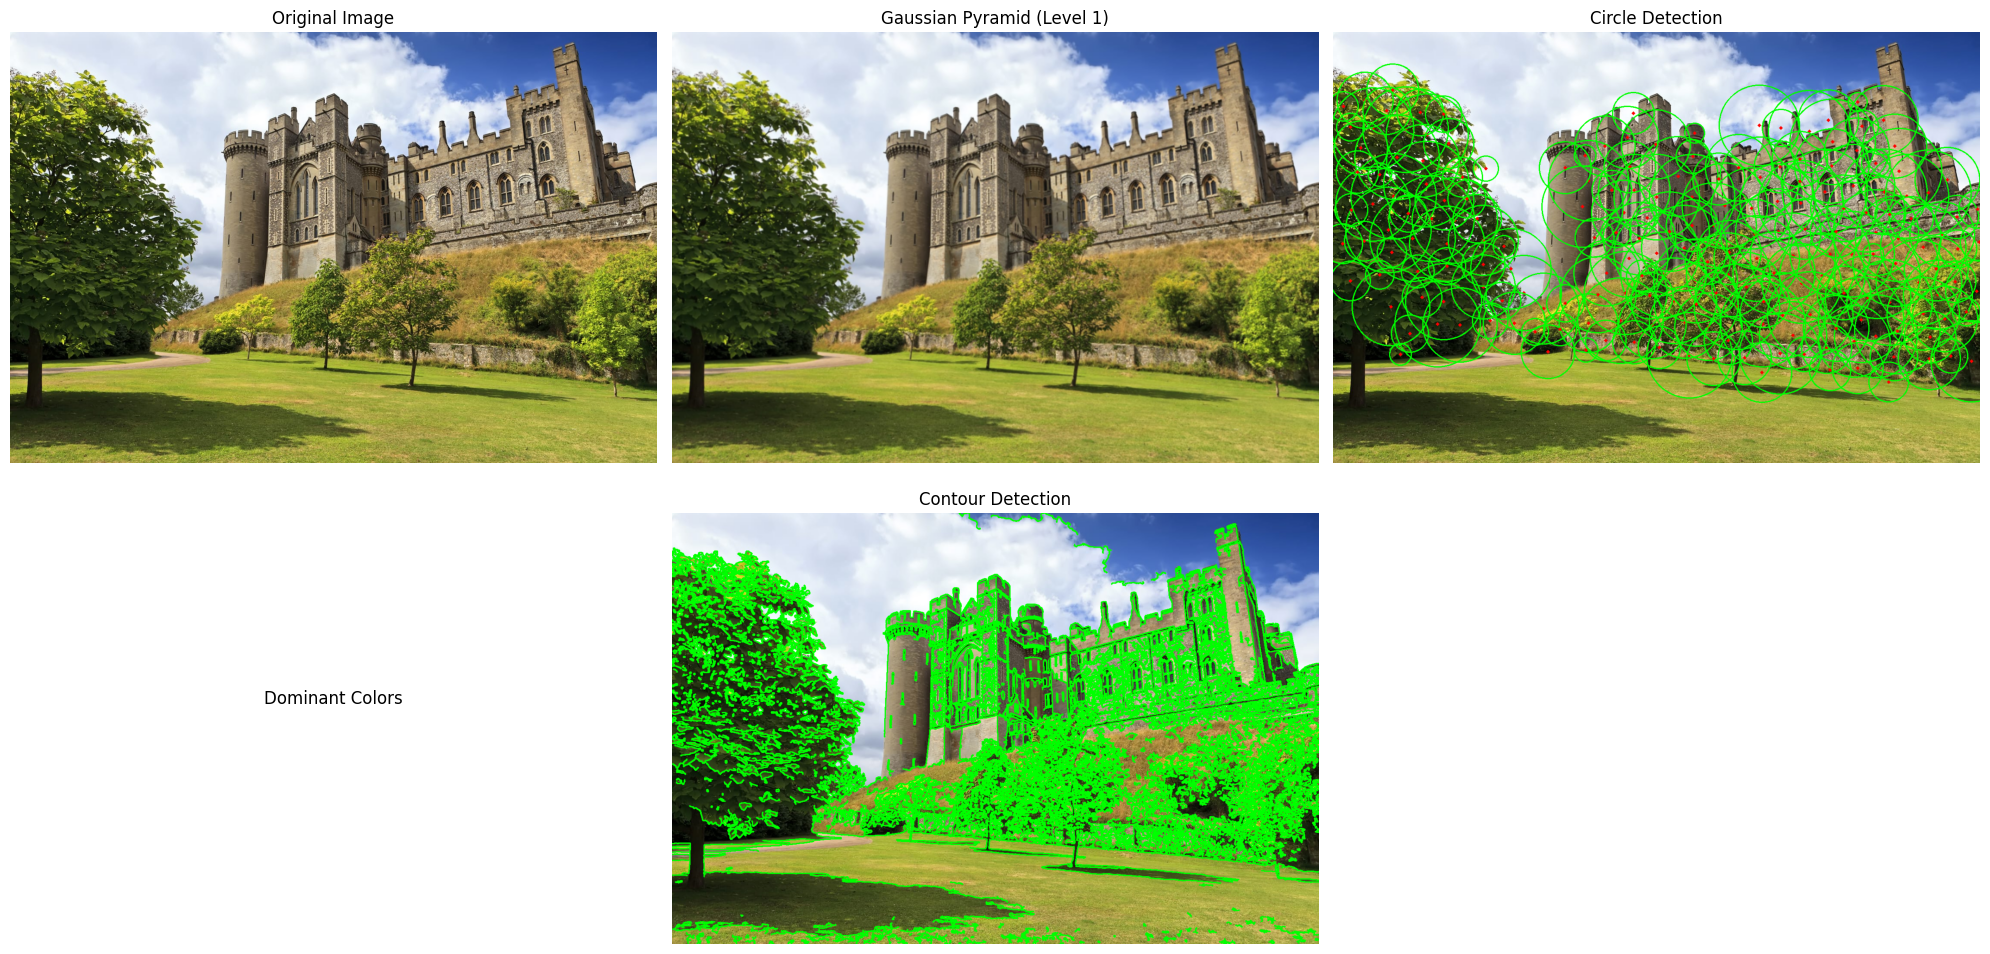

In [61]:
if __name__ == "__main__":
    # Ganti dengan path gambar Anda
    image_path = "castil.jpg"
    visualize_results(image_path)